# Dmitry Kostyukov

## Research question/interests

How effective are common indicators such as RSI at predicting future price trends of stocks? Are they more effective with stocks or ETFs? Are they more effective at predicting up-trends or down-trends? Are they more effective with high volume stocks or low volume stocks?

In [8]:
import pandas as pd
amzn = pd.read_csv("../data/raw/archive/Stocks/amzn.us.txt", sep=",", header=None, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
amzn

,Date,Open,High,Low,Close,Volume,OpenInt
0,Date,Open,High,Low,Close,Volume,OpenInt
1,1997-05-16,1.97,1.98,1.71,1.73,14700000,0
2,1997-05-19,1.76,1.77,1.62,1.71,6106800,0
3,1997-05-20,1.73,1.75,1.64,1.64,5467200,0
4,1997-05-21,1.64,1.65,1.38,1.43,18853200,0
...,...,...,...,...,...,...,...
5149,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5150,2017-11-07,1124.74,1130.6,1117.5,1123.17,2684443,0
5151,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5152,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0


# Task 1: Exploratory Data Analysis



In [9]:
#Importing libraries that will be needed for EDA
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables

Importing in four stocks and two ETFs, and doing some basic analysis:

In [10]:
amzn = pd.read_csv("../data/raw/archive/Stocks/amzn.us.txt", sep=",", header=0)
nvda = pd.read_csv("../data/raw/archive/Stocks/nvda.us.txt", sep=",", header=0)
msft = pd.read_csv("../data/raw/archive/Stocks/msft.us.txt", sep=",", header=0)
v = pd.read_csv("../data/raw/archive/Stocks/v.us.txt", sep=",", header=0)
goog = pd.read_csv("../data/raw/archive/Stocks/goog.us.txt", sep=",", header=0)
spy = pd.read_csv("../data/raw/archive/ETFs/spy.us.txt", sep=",", header=0)
dia = pd.read_csv("../data/raw/archive/ETFs/dia.us.txt", sep=",", header=0)
dia.shape
dia.columns
dia.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,92.177,93.031,92.075,92.977,5803401,0
1,2005-02-28,92.763,93.515,92.037,92.414,8688535,0
2,2005-03-01,92.474,93.085,92.474,92.867,6192040,0
3,2005-03-02,92.511,93.266,92.456,92.728,8885876,0
4,2005-03-03,93.031,93.247,92.355,92.885,9628615,0


In [11]:
amzn

,Date,Open,High,Low,Close,Volume,OpenInt
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0
...,...,...,...,...,...,...,...
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0


Lets analyze some basic statistics about the Amazon stock using .describe().

In [12]:
amzn.describe()

,Open,High,Low,Close,Volume,OpenInt
count,5153.000000,5153.000000,5153.000000,5153.000000,5.153000e+03,5153.0
mean,181.747357,183.880652,179.466684,181.769343,7.837325e+06,0.0
std,239.611052,241.226109,237.638139,239.548391,7.594745e+06,0.0
min,1.410000,1.450000,1.310000,1.400000,0.000000e+00,0.0
25%,35.500000,36.130000,35.000000,35.550000,3.779449e+06,0.0
50%,70.900000,72.750000,69.020000,70.700000,5.902992e+06,0.0
75%,242.850000,245.770000,240.670000,243.880000,8.888949e+06,0.0
max,1126.100000,1135.540000,1124.060000,1132.880000,1.043288e+08,0.0


The count seems useless as it simply tells us the amount of rows in the data set and is the same value for all columns.

The mean close price is slightly higher than the mean open price. This makes sense as AMZN has risen in price from 1997 to 2017 and the difference of the two numbers would tell us the average daily change in price over the 20 year period.

I also noticed that the minimum volume is 0, which is most likely wrong as a trading day with 0 volume is unheard of for a well known stock such as AMZN.

In [13]:
amzn_cleaned = amzn[amzn['Volume'].between(1, 1.043288e+08)]
amzn_cleaned.describe()

,Open,High,Low,Close,Volume,OpenInt
count,5152.000000,5152.000000,5152.000000,5152.000000,5.152000e+03,5152.0
mean,181.754839,183.887671,179.473779,181.776070,7.838846e+06,0.0
std,239.633708,241.248997,237.660659,239.571155,7.594697e+06,0.0
min,1.410000,1.450000,1.310000,1.400000,4.872000e+05,0.0
25%,35.497500,36.127500,35.000000,35.550000,3.779787e+06,0.0
50%,70.900000,72.750000,68.980000,70.695000,5.906996e+06,0.0
75%,242.942500,246.005000,240.842500,243.890000,8.891018e+06,0.0
max,1126.100000,1135.540000,1124.060000,1132.880000,1.043288e+08,0.0


To see if I'm right about the volume, I cleaned the dataset by setting the possible volumes from 1 to the maximum of 1.043288e+08, now the mininum volume is shown to be 4.872000e+05, which seems a lot more plausable. I can also see that the count went down by 1, which means that it was just one data entry that had a volume of 0.

# Visualizations:
Next, I will analyze some visualizations of the data sets.

<AxesSubplot:>

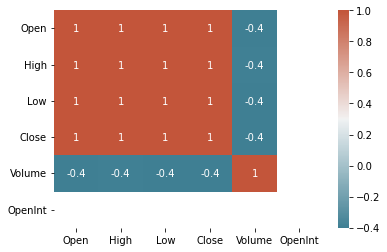

In [14]:
#Heatmap for the V (VISA) dataset
corr = v.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='Open', ylabel='Volume'>

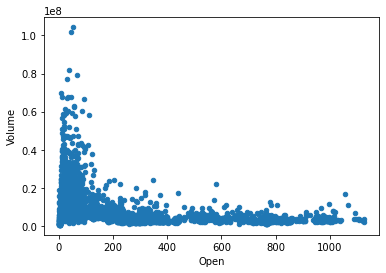

In [15]:
amzn_cleaned.plot(kind='scatter', x='Open', y='Volume')

From this scatter plot we can see that the max volume that we saw before using .describe() is an outlier, and that most trading days have much less volume. We can also see that the 0 to 200 range has the highest volume days, especially as the open price gets closer to around 50. This perfectly correlates with the dot-com bubble, which was a period of time in the late 90s/ early 2000s during which the Amazon stock surged in popularity.

<AxesSubplot:ylabel='Frequency'>

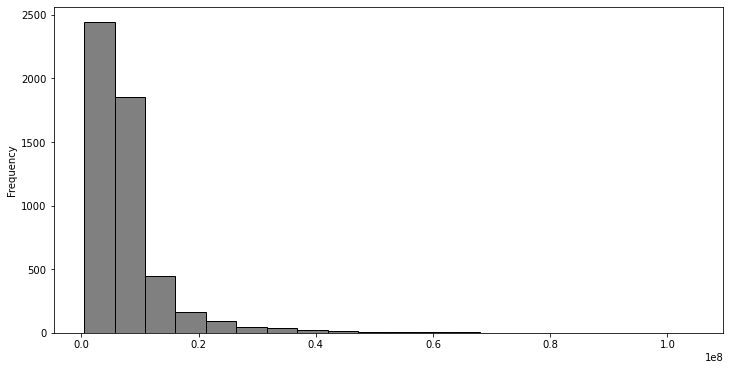

In [16]:
amzn_cleaned['Volume'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

From this histogram we can see that the most common volume is between 0.0(1.043288e+08) and 0.2(1.043288e+08).

# Task 2: Analysis Pipeline

In [17]:
amzn = pd.read_csv("../data/raw/archive/Stocks/amzn.us.txt", sep=",", header=0)
amzn.dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object

In [27]:
amzn_cleaned = amzn[amzn['Volume'].between(1, 1.043288e+08)] #Removing outliers/ incorrect entries.
amzn_cleaned = amzn_cleaned.drop(['OpenInt'], axis=1) #Dropping OpenInt as it provides no usefull data.
amzn_cleaned['Date'] = pd.to_datetime(amzn_cleaned['Date']) #Changing the data from object type to DateTime type.
amzn_cleaned.index = amzn_cleaned.Date
amzn_cleaned

,Date,Open,High,Low,Close,Volume
Date,,,,,,
1997-05-16,1997-05-16,1.97,1.98,1.71,1.73,14700000
1997-05-19,1997-05-19,1.76,1.77,1.62,1.71,6106800
1997-05-20,1997-05-20,1.73,1.75,1.64,1.64,5467200
1997-05-21,1997-05-21,1.64,1.65,1.38,1.43,18853200
1997-05-22,1997-05-22,1.44,1.45,1.31,1.40,11776800
...,...,...,...,...,...,...
2017-11-06,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738
2017-11-07,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443
2017-11-08,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010


In [38]:
amzn_rsi = amzn_cleaned
delta = amzn_rsi['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)

ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()

rs = ema_up/ema_down

amzn_rsi['RSI'] = 100 - (100/(1+rs))
analysis2_amzn_RSI = amzn_rsi
analysis2_amzn_RSI

,Date,Open,High,Low,Close,Volume,Delta,delta,up,down,RSI
Date,,,,,,,,,,,
1997-05-16,1997-05-16,1.97,1.98,1.71,1.73,14700000,NaN,NaN,NaN,NaN,NaN
1997-05-19,1997-05-19,1.76,1.77,1.62,1.71,6106800,-0.02,-0.02,0.00,0.02,0.000000
1997-05-20,1997-05-20,1.73,1.75,1.64,1.64,5467200,-0.07,-0.07,0.00,0.07,0.000000
1997-05-21,1997-05-21,1.64,1.65,1.38,1.43,18853200,-0.21,-0.21,0.00,0.21,0.000000
1997-05-22,1997-05-22,1.44,1.45,1.31,1.40,11776800,-0.03,-0.03,0.00,0.03,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,9.06,9.06,9.06,-0.00,75.958310
2017-11-07,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,2.51,2.51,2.51,-0.00,76.304545
2017-11-08,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,9.71,9.71,9.71,-0.00,77.645752


# Task 3: Method Chaining and Writing Python Programs

In [19]:
def load_and_process(url_or_path_to_csv_file):
    df = (pd.read_csv(url_or_path_to_csv_file, sep=",", header=0).drop(['OpenInt'], axis=1))
    df['Date'] = pd.to_datetime(df['Date'])
    df = [df['Volume'].between(1, 1.0e+15)]

          
    return df

In [20]:
import project_functions2

In [21]:
goog = project_functions2.load_and_process("../data/raw/archive/Stocks/goog.us.txt")
goog

[0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 911    True
 912    True
 913    True
 914    True
 915    True
 Name: Volume, Length: 916, dtype: bool]

In [39]:
analysis2_amzn_RSI.to_csv("analysis2_amzn_RSI.csv", index=False)